# Use apriori algorithm to find association rules

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
path = '/content/drive/MyDrive/cmpe255/association_rule/data/Groceries_dataset.csv'

df_groceries = pd.read_csv(path, delimiter=',')

In [4]:
df_groceries.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [5]:
# check if any NaN values or not
df_groceries.isnull().sum(axis = 0)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df_groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
# remove space at begining and endding
df_groceries['itemDescription'] = df_groceries['itemDescription'].str.strip()
# lower case
df_groceries['itemDescription'] = df_groceries['itemDescription'].str.lower()

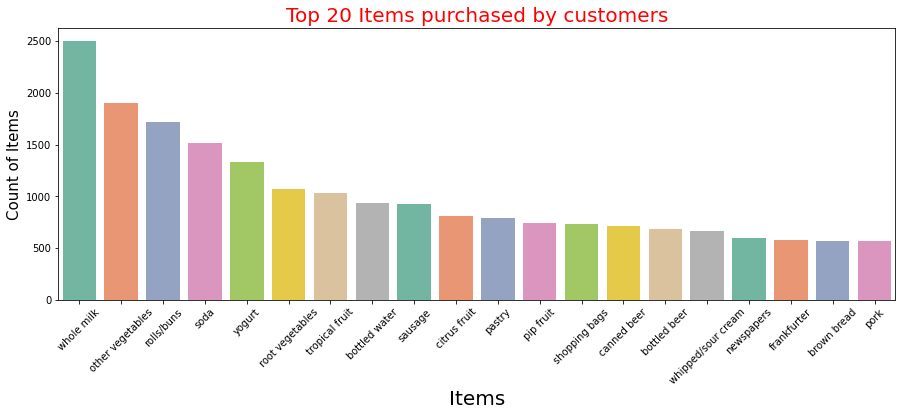

In [8]:
s = plt.figure(figsize=(15,5))
sns.barplot(x = df_groceries.itemDescription.value_counts().head(20).index, y = df_groceries.itemDescription.value_counts().head(20).values, palette = 'Set2')
plt.xlabel('Items', size = 20)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red', size = 20)
plt.show()

In [9]:
# combine rows if member_numebr and itemDescrip are same
transactions_str = df_groceries.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().reset_index(name ='Count')
transactions_str

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [10]:
# create a table: rows = member numbers; columns/features = items; values = count
my_basket = transactions_str.pivot_table(index='Member_number', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [11]:
# Defining an encoding function to make the data suitable for the concerned libraries
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Apply apriori algorithm

min support is set to 0.01

In [12]:
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.031042,(baking powder)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
3011,0.011031,"(whipped/sour cream, soda, whole milk, yogurt)"
3012,0.010518,"(bottled water, other vegetables, whole milk, ..."
3013,0.013597,"(other vegetables, whole milk, sausage, yogurt..."
3014,0.010005,"(other vegetables, whole milk, yogurt, rolls/b..."


We have all the itemsets

And then we find the association rules from those itemsets

In [13]:
# min threhold is set to 2
rules = association_rules(frequent_items, metric = "lift", min_threshold = 2)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(bottled water, rolls/buns, yogurt)","(whole milk, other vegetables)",0.026424,0.191380,0.010518,0.398058,2.079934,0.005461,1.343352
64,"(shopping bags, rolls/buns, yogurt)","(whole milk, other vegetables)",0.025141,0.191380,0.010005,0.397959,2.079417,0.005194,1.343131
41,"(sausage, yogurt, other vegetables)","(whole milk, rolls/buns)",0.037199,0.178553,0.013597,0.365517,2.047107,0.006955,1.294672
17,"(frozen meals, other vegetables)","(whole milk, rolls/buns)",0.027707,0.178553,0.010005,0.361111,2.022430,0.005058,1.285743
42,"(sausage, rolls/buns, other vegetables)","(whole milk, yogurt)",0.041816,0.150590,0.013597,0.325153,2.159196,0.007300,1.258671
...,...,...,...,...,...,...,...,...,...
69,"(whole milk, yogurt)","(shopping bags, rolls/buns, other vegetables)",0.150590,0.032837,0.010005,0.066440,2.023291,0.005060,1.035994
14,"(whole milk, yogurt)","(sausage, curd)",0.150590,0.032068,0.010005,0.066440,2.071850,0.005176,1.036818
18,"(whole milk, rolls/buns)","(frozen meals, other vegetables)",0.178553,0.027707,0.010005,0.056034,2.022430,0.005058,1.030010
37,"(whole milk, other vegetables)","(bottled water, rolls/buns, yogurt)",0.191380,0.026424,0.010518,0.054960,2.079934,0.005461,1.030196


In [14]:
# sort the list by confidence value
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(bottled water, rolls/buns, yogurt)","(whole milk, other vegetables)",0.026424,0.191380,0.010518,0.398058,2.079934,0.005461,1.343352
64,"(shopping bags, rolls/buns, yogurt)","(whole milk, other vegetables)",0.025141,0.191380,0.010005,0.397959,2.079417,0.005194,1.343131
41,"(sausage, yogurt, other vegetables)","(whole milk, rolls/buns)",0.037199,0.178553,0.013597,0.365517,2.047107,0.006955,1.294672
17,"(frozen meals, other vegetables)","(whole milk, rolls/buns)",0.027707,0.178553,0.010005,0.361111,2.022430,0.005058,1.285743
42,"(sausage, rolls/buns, other vegetables)","(whole milk, yogurt)",0.041816,0.150590,0.013597,0.325153,2.159196,0.007300,1.258671
...,...,...,...,...,...,...,...,...,...
69,"(whole milk, yogurt)","(shopping bags, rolls/buns, other vegetables)",0.150590,0.032837,0.010005,0.066440,2.023291,0.005060,1.035994
14,"(whole milk, yogurt)","(sausage, curd)",0.150590,0.032068,0.010005,0.066440,2.071850,0.005176,1.036818
18,"(whole milk, rolls/buns)","(frozen meals, other vegetables)",0.178553,0.027707,0.010005,0.056034,2.022430,0.005058,1.030010
37,"(whole milk, other vegetables)","(bottled water, rolls/buns, yogurt)",0.191380,0.026424,0.010518,0.054960,2.079934,0.005461,1.030196


# Try another method - FP Growth

In [1]:
! pip install mlxtend --upgrade
! pip install pyfpgrowth

In [2]:
!pip install pyspark

In [3]:
import pyfpgrowth
import mlxtend
print(mlxtend.__version__)
# from pyspark.ml.fpm import FPGrowth
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth


0.19.0


In [4]:
path = '/content/drive/MyDrive/cmpe255/association_rule/data/Groceries_dataset.csv'

df_groceries = pd.read_csv(path, delimiter=',')

In [5]:
# Get all the transactions as a list of lists
transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(df_groceries.groupby(['Member_number', 'Date']))]

In [6]:
transactions[0:5]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables']]

In [7]:
# The following instructions transform the dataset into the required format 
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(transactions).transform(transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [8]:
trans_encoder_matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [9]:
#patterns = pyfpgrowth.find_frequent_patterns(trans_encoder_matrix, 0.02)
frequent_itemsets = fpgrowth(trans_encoder_matrix, min_support=0.001, use_colnames=True)

In [10]:
frequent_itemsets

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
745,0.001403,"(chewing gum, yogurt)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(chewing gum, soda)"
748,0.001069,"(pasta, whole milk)"


In [17]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.02)

In [18]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
2,(yogurt),(soda),0.085879,0.097106,0.005814,0.067704,0.697219,-0.002525,0.968463
3,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,-0.002525,0.972342
4,(yogurt),(other vegetables),0.085879,0.122101,0.008087,0.094163,0.771192,-0.002399,0.969158
...,...,...,...,...,...,...,...,...,...
994,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855
995,(chewing gum),(other vegetables),0.012030,0.122101,0.001069,0.088889,0.727994,-0.000400,0.963547
996,(chewing gum),(soda),0.012030,0.097106,0.001002,0.083333,0.858167,-0.000166,0.984975
997,(pasta),(whole milk),0.008087,0.157923,0.001069,0.132231,0.837316,-0.000208,0.970394
